In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
df = pd.read_csv("Data/covid.csv")

# Data Exploration

In [3]:
df.shape

(566602, 23)

In [4]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [5]:
df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [6]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [8]:
# How many female patients are pregnant

x = df.loc[(df.sex == 1) & (df.pregnancy == 1)]
print(len(x))

4063


In [9]:
# How many Covid positive patients were tobacco users

x = df.loc[(df.covid_res == 2) & (df.tobacco == 1)]
print(len(x))

25846


# Finding value counts of categorical variables

CLAVE	DESCRIPCIÓN
1	YES
2	NO
97	Not Applicable
98	Ignore
99	Not Specified

1	Female
2	Male
99	Not Specified

In [10]:
# Create a subset of categorical variables only
subset = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [11]:
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [12]:
# Removing rows that have covid_res= 3 meaning 'pending'
index_names = df[ df['covid_res'] == 3 ].index
df.drop(index_names, inplace = True)

In [13]:
# Checking value_counts of covid_res column
df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [14]:
# Change date_died column to categorical data "9999-99-99" to 0 and row with date to 1
df.loc[df.date_died == "9999-99-99", "date_died"] = 0

In [15]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [16]:
df.loc[df.date_died != 0, "date_died"] = 1

In [17]:
df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [18]:
df['date_died'].value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

In [19]:
df["date_died"] = df["date_died"].astype("int64")

# Machine Learning

In [20]:
df = df.sample(n=10000)

In [21]:
# Create our features
# X = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])
X = df.drop(columns= ['covid_res', 'date_died', 'entry_date', 'date_symptoms', 'id', 'age', 'patient_type', 
                      'intubed', 'icu', 'pneumonia','other_disease','sex'])

# Create our target
y = df['date_died']
#y = df['covid_res']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 11) (3300, 11) (6700,) (3300,)


In [23]:
X.dtypes

pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
dtype: object

In [24]:
categorical_features_indices = np.where(X.dtypes != np.float64)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
y.value_counts()

0    9319
1     681
Name: date_died, dtype: int64

# LightGBM Classifier

In [28]:
# fit model to training data
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')

[1]	training's binary_logloss: 0.238991	valid_0's binary_logloss: 0.240874
[2]	training's binary_logloss: 0.232375	valid_0's binary_logloss: 0.235611
[3]	training's binary_logloss: 0.22725	valid_0's binary_logloss: 0.23183
[4]	training's binary_logloss: 0.223201	valid_0's binary_logloss: 0.228745
[5]	training's binary_logloss: 0.220054	valid_0's binary_logloss: 0.226149
[6]	training's binary_logloss: 0.217296	valid_0's binary_logloss: 0.224174
[7]	training's binary_logloss: 0.214999	valid_0's binary_logloss: 0.222482
[8]	training's binary_logloss: 0.212964	valid_0's binary_logloss: 0.22128
[9]	training's binary_logloss: 0.21129	valid_0's binary_logloss: 0.220268
[10]	training's binary_logloss: 0.20983	valid_0's binary_logloss: 0.219427
[11]	training's binary_logloss: 0.208559	valid_0's binary_logloss: 0.218807
[12]	training's binary_logloss: 0.207493	valid_0's binary_logloss: 0.218325
[13]	training's binary_logloss: 0.206128	valid_0's binary_logloss: 0.218007
[14]	training's binary_log

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [29]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9357
Testing accuracy 0.9282


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

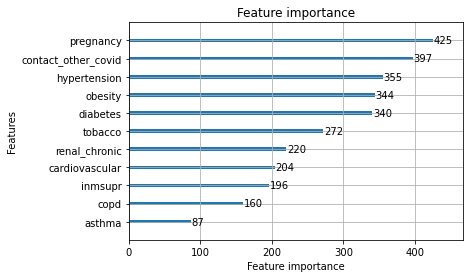

In [30]:
# Create a dataframe of feature importance 
lgb.plot_importance(model)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

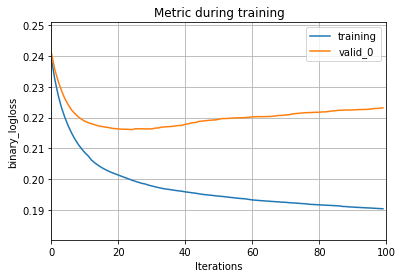

In [34]:
lgb.plot_metric(model)

In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3075
           1       0.27      0.03      0.06       225

    accuracy                           0.93      3300
   macro avg       0.60      0.51      0.51      3300
weighted avg       0.89      0.93      0.90      3300

